In [55]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
STUDY = 'hp_study_cartpole'
STUDY_DIR = os.path.join(os.getcwd(), STUDY)
HP_KINDS = os.listdir(STUDY_DIR)
PICKLE_NAME = 'metrics.pkl'
METRICS = ['exponentiated_avg_return']


In [57]:
results = {}
for HP_KIND in HP_KINDS:
    RUNS = os.listdir(os.path.join(STUDY_DIR, HP_KIND))
    results[HP_KIND] = []
    for RUN in RUNS:
        result_path = os.path.join(STUDY_DIR, HP_KIND, RUN, PICKLE_NAME)
        try:
            with open(result_path, 'rb') as f:
                result = pickle.load(f)
                results[HP_KIND].append(result)
        except:
            pass


In [58]:
# put results into a pandas dataframe
df = pd.DataFrame()
for HP_KIND in HP_KINDS:
    for result in results[HP_KIND]:
        df = df.append(result, ignore_index=True)
        # add HP_KIND column
        df.loc[df.index[-1], 'HP_KIND'] = HP_KIND


/tmp/ipykernel_1937187/2598739400.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/tmp/ipykernel_1937187/2598739400.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/tmp/ipykernel_1937187/2598739400.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/tmp/ipykernel_1937187/2598739400.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/tmp/ipykernel_1937187/2598739400.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

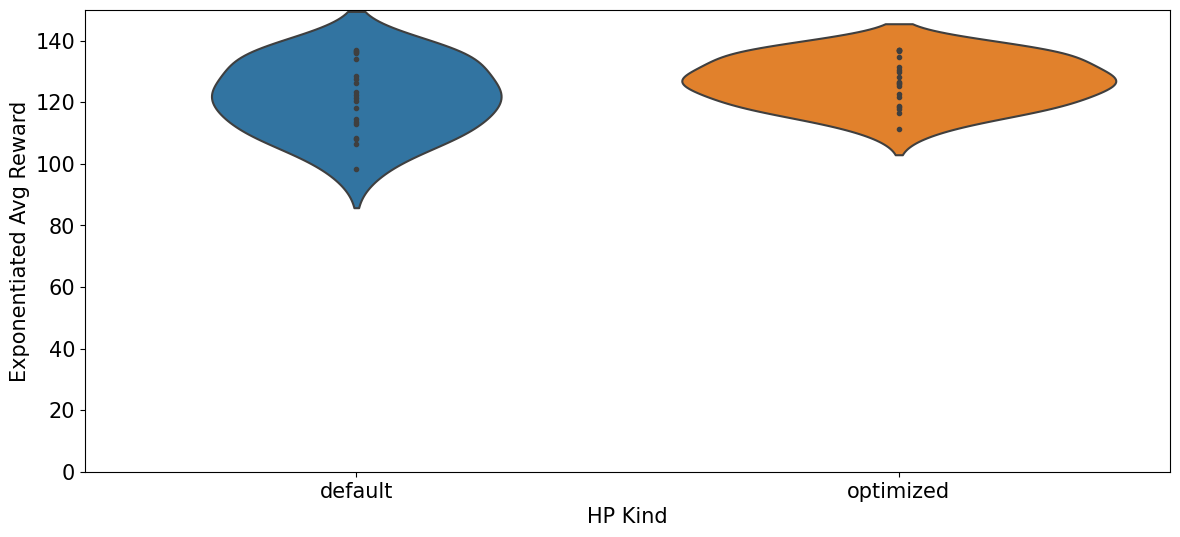

In [59]:
# plot boxen plot for each HP_KIND

plt.figure(figsize=(14, 6))
plt.rcParams.update({'font.size': 15})
# change the order of the boxen plot
order=HP_KINDS
ax = sns.violinplot(x='HP_KIND', y='exponentiated_avg_return', data=df, inner='points', order=order)
plt.setp(ax.get_xticklabels())
plt.xlabel('HP Kind')
plt.ylabel('Exponentiated Avg Reward')
plt.ylim([0, 150])
plt.show()
plt.close()